# MTH8999 : Analyse des valeurs extrêmes en environnement

Jonathan Jalbert<br/>
Professeur agrégé au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


# Chapitre 2 - Rappel de statistique

In [1]:
using Distributions, Optim, Gadfly, Random

# On fixe le seed pour reproduire les résultats présentés en classe.
Random.seed!(12345)

TaskLocalRNG()

## 2.2 Modèle non paramétrique

In [2]:
# Génération d'un échantillon de taille n de la loi exponentielle standard.

n = 50

pd = Exponential(1)

x = sort(rand(pd, n))

50-element Vector{Float64}:
 0.006265551326319354
 0.01832456186761928
 0.06422493896000635
 0.08525348469867261
 0.10030676889746695
 0.11943939152876328
 0.12011842910010737
 0.15960643264802882
 0.1991559930042548
 0.24103387527935716
 0.2604555814992481
 0.2616102167584001
 0.3127305083026577
 ⋮
 1.2290053095713374
 1.2750534491165662
 1.3656311689699316
 1.4366162718435278
 1.6863035620987938
 1.7970630625727158
 1.9877807677755348
 2.0775966583539103
 2.495348135341168
 2.6339331794688845
 2.7548407883088695
 3.350090082845518

In [3]:
# Définition de la fonction de répartition empirique

F(z) = count(x .≤ z )/(length(x) +1)

F (generic function with 1 method)

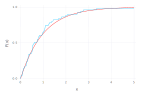

In [4]:
# Affichage de la fonction de répartition empirique et de la vraie

empirical = layer(F, 0, 5)
model = layer(x->cdf(Exponential(1), x), 0, 5, Theme(default_color="red"))
plot(empirical, model, Guide.xlabel("x"), Guide.ylabel("F(x)"))

## 2.3 Modèle paramétrique

In [5]:
# Estimation avec les données du paramètre de la loi exponentielle

θ̂ = 1/mean(x)

1.1580638005274728

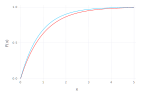

In [6]:
# Affichage de la fonction de répartition estimée et de la vraie

estimated = layer(x-> cdf(Exponential(1/θ̂), x), 0, 5)
plot(estimated, model, Guide.xlabel("x"), Guide.ylabel("F(x)"))

In [7]:
# Estimation de la loi normale sur les données générées par la loi exponentielle

fm = fit(Normal, x)

Normal{Float64}(μ=0.8635102828916004, σ=0.7736355566527042)

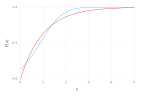

In [8]:
# Affichage de la fonction de répartition estimée et de la vraie

estimated = layer(x-> cdf(fm, x), 0, 5)
plot(estimated, model, Guide.xlabel("x"), Guide.ylabel("F(x)"))

## 2.4.1 Normalité asymptotique des estimateurs du maximum de vraisemblance 

### Exemple 7

In [9]:
n = 9
x̄ = 10
s² = 4

μ̂ = x̄
σ̂² = (n-1)*s²/n

V = [σ̂²/2 0; 0 2/n]

θ̂ = MvNormal([μ̂, σ̂²], V)

FullNormal(
dim: 2
μ: [10.0, 3.5555555555555554]
Σ: [1.7777777777777777 0.0; 0.0 0.2222222222222222]
)


### Exemple 8

In [10]:
pd = Normal(μ̂, sqrt(V[1, 1]))

quantile(pd, [.025, .975])

2-element Vector{Float64}:
  7.386714687279921
 12.613285312720077

## 2.4.2 Estimation par maximum de la vraisemblance d'une fonction des paramètres

### Exemple 9

In [11]:
∇ϕ = [1 ; 1/sqrt(σ̂²)]

2-element Vector{Float64}:
 1.0
 0.5303300858899106

In [12]:
V_ϕ = (∇ϕ)'*V*(∇ϕ)

1.8402777777777777

In [13]:
ϕ̂ = x̄*1.96*sqrt(σ̂²)

36.958114430016884

In [14]:
pd = Normal(ϕ̂, sqrt(V_ϕ))
    
quantile(pd, [.025, .975])

2-element Vector{Float64}:
 34.299289256754854
 39.616939603278915

## 2.5 Vérification de l'adéquation d'un modèle aux données

In [15]:
# Génération de données distribuées selon la loi exponentielle standard

pd = Exponential(1)

Random.seed!(12345)

n = 100
x = sort(rand(pd, n));

In [16]:
# Estimation par maximum de la vraisemblance
θ̂ = 1/mean(x)

fm = Exponential(1/θ̂)
# fm = fit(Normal, x)

Exponential{Float64}(θ=0.851055802592838)

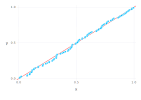

In [17]:
# ppplot

p̃ = collect(1:n)./(n+1)

plot(x = cdf(fm, x), y=p̃, Geom.point,
    Geom.abline(color="red"))

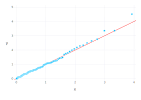

In [18]:
# qqplot

q̂ = quantile(fm, p̃)

plot(x=q̂, y=x, Geom.point,
    Geom.abline(color="red"))

## 2.A Optimisation numérique

In [19]:
# Génération de données distribuées selon la loi de Fréchet avec α = 2

n = 100
pd = Frechet(2)

Random.seed!(8999)
x = rand(pd, n);

In [20]:
# Fonction de log-vraisemblance

ℓ(θ) = n*log(θ) - (1+θ)*sum(log.(x)) -sum(x.^-θ)

ℓ (generic function with 1 method)

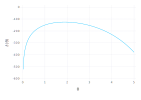

In [21]:
# Affichage de la log-vraisemblance

plot(ℓ, 0, 5,
    Guide.xlabel("θ"), Guide.ylabel("ℓ(θ)"))

In [22]:
# Définition de la fonction objectif

g(θ) = -ℓ(θ)

g (generic function with 1 method)

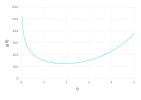

In [23]:
# Affichage de la fonction objectif

plot(g, 0, 5,
    Guide.xlabel("θ"), Guide.ylabel("g(θ)"))

In [24]:
# Dérivée première de la fonction objectif

dg1(θ) = -n/θ + sum(log.(x)) - sum(log.(x) .* x.^-θ)

dg1 (generic function with 1 method)

In [25]:
# Dérivée seconde de la fonction objectif

dg2(θ) = n/θ^2 +sum( (log.(x)).^2 .* x.^-θ )

dg2 (generic function with 1 method)

In [26]:
# Algorithme de Newton-Raphson

θ̂ = [1.]
ε = 1e-4
maxiter = 20

iter = 0
relerror = 1.

while (relerror > ε) & (iter < maxiter)
    
    δ = -dg1(θ̂[end])/dg2(θ̂[end])
    
    push!(θ̂, θ̂[end] + δ)
    
    relerror = abs(δ)/θ̂[end]
    
    iter += 1
    
end

In [27]:
θ̂

6-element Vector{Float64}:
 1.0
 1.535486737302914
 1.842424644247235
 1.8831231527020407
 1.8835644668651406
 1.8835645155134717

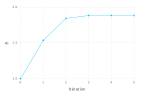

In [28]:
# Affichage de la trace de l'optimisation

plot(x=(0:length(θ̂)-1), y=θ̂, Geom.point, Geom.line,
    Guide.xlabel("Itération"), Guide.ylabel("θ̂"))